# 陣列上的計算 : Broadcasting
有種延伸的概念，把一個純量加到一個陣列中

In [2]:
# 把數值5拉長或是複製成[5,5,5]
import numpy as np
a = np.array([0,1,2])
b = np.array([5,5,5])
a+b, a + 5

(array([5, 6, 7]), array([5, 6, 7]))

In [3]:
# 一維加到二維，一維被拉長
M = np.ones((3,3))
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [4]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
a , b, a + b 

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]),
 array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4]]))

![image](.\2-4.jpg)
* 這樣的計算中並不會占用到額外的記憶體
#### Broadcasting 範例

In [5]:
#1
np.random.seed(0)
X = np.random.random((10,3)) # 0~1之間，10 X 3
Xmean = X.mean(0) # 0 : 每一層的平均值 
X_centered = X - Xmean # broadcasting
X_centered.mean(0) # 近似0

array([1.11022302e-17, 1.22124533e-16, 3.33066907e-17])

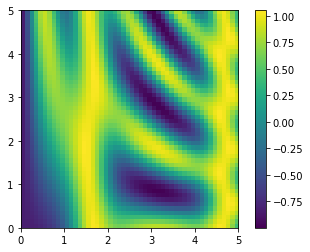

In [6]:
#2 : z = f(x,y)
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
z = np.sin(x) ** 10 + np.cos(10+y*x)*np.cos(x)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z,origin='lower', extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

# 比較、遮罩、布林邏輯
例如: 想大於某一個值得所有元素進行擷取、修改、計數或其他操作時使用

### 範例: 計算下雨天數
* 資料說明 : 記錄某一座城市一整年中每一天的降雨量
* 統計20114年的日降雨統計數據

In [7]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('Seattle2014.csv')
rainfall.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [8]:
inches = rainfall['PRCP'].values / 254 # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

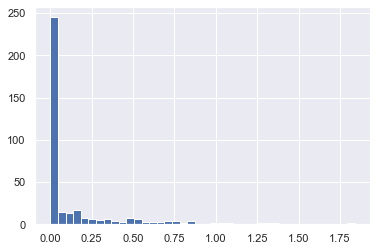

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(inches, 40)

在201年絕大部分的日子，西雅圖量測到的降雨量都趨近於0。
但這張圖並無法傳遞出一些更具體的資訊: 例如
* 這一年有多少個下雨天? 
* 那些下雨天的平均降雨量是多少? 
* 有多少天的降雨量是超過半英寸的?

### ufuncs的比較運算子
使用 +、-、*、/，搭配 > 、 < 篩選資料
| 運算子 | 等價的ufunc | 
| -------- | -------- | 
| ==     | np.equal     | 
| !=     | np.not_equal     |
| <     | np.less     | 
| <=     | np.less_equal     | 
| >     | np.less_greater     | 
| >=     | np.greater_equal     | 

In [10]:
x = np.array([0,1,2,3,4,5])
print("x<4 : ",x<4)
print("x<=4 : ",x<=4)
print("x>=4 : ",x>=4)
print("x==4 : ",x==4)
print('印值 :',x[(2 * x)==(x ** 2)]) # 遮罩用法

x<4 :  [ True  True  True  True False False]
x<=4 :  [ True  True  True  True  True False]
x>=4 :  [False False False False  True  True]
x==4 :  [False False False False  True False]
印值 : [0 2]


In [11]:
# 計算項目數量, 符合的總個數, 符合的總和
np.count_nonzero(x<4), np.sum(x<4), np.sum(x[x<4])

(4, 4, 6)

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
print(x < 6)
print(np.sum(x<6, axis=1)) 
print(np.sum((x>2)&(x<4))) # 範圍
print(np.sum(~( (x <= 2) | (x >= 4) )) ) # A AND B == NOT(A OR B)
print("<---------------------------------->")
print(np.any(x>8))  # 是否有任一個值大於8
print(np.all(x<10)) # 是否所有的值都小於10
print(np.any(x<8,axis=1))


[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]
[4 2 2]
3
3
<---------------------------------->
True
True
[ True  True  True]


In [14]:
# 回答剛剛3點問題
print("沒有下雨的天數: ", np.sum(inches == 0))
print("下雨的天數: ", np.sum(inches != 0))
print("雨量超過0.5英寸的天數: ", np.sum(inches > 0.5))
print("雨量小於0.1英寸的下雨天數: ", np.sum((inches > 0)&(inches<0.2)))

沒有下雨的天數:  215
下雨的天數:  150
雨量超過0.5英寸的天數:  37
雨量小於0.1英寸的下雨天數:  75


# Fancy 索引
傳遞一個陣列作為索引，以一次存取多個陣列元素

In [15]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100,size=10)
ind = [3,7,2]
ind2 = np.array([[3,7],[4,5]])

[x[3],x[7],x[2]], x[ind], x[ind2]

([71, 86, 14],
 array([71, 86, 14]),
 array([[71, 86],
        [60, 20]]))

In [16]:
X = np.arange(12).reshape((3,4))
row = np.array([0,1,2])
col = np.array([2,1,3])
X, X[row,col]  # (選哪一排, 那一排的第幾個)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([ 2,  5, 11]))

In [17]:
X[row[:,np.newaxis],col], X[2,[2,0,1]], X[1:,[2,0,1]]

(array([[ 2,  1,  3],
        [ 6,  5,  7],
        [10,  9, 11]]),
 array([10,  8,  9]),
 array([[ 6,  4,  5],
        [10,  8,  9]]))

In [18]:
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# 範例 : 選擇隨機點
從一個二維的常態分佈中取出要的點

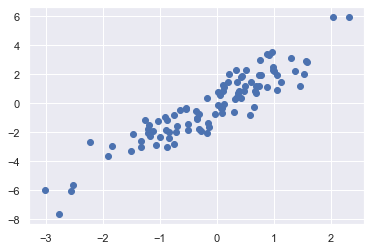

In [19]:
mean = [0,0]
cov = [[1,2],[2,5]] # diagonal covariance
X = rand.multivariate_normal(mean,cov,100)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
plt.scatter(X[:,0], X[:,1]);

In [20]:
# 選20個不重複的點
indices = np.random.choice(X.shape[0],20 ,replace=False)
indices

array([ 7, 89, 97, 26, 19, 25, 59, 22, 81, 16, 72, 69, 40, 45, 54, 33, 24,
        8, 77, 51])

In [21]:
selection = X[indices]
selection.shape

(20, 2)

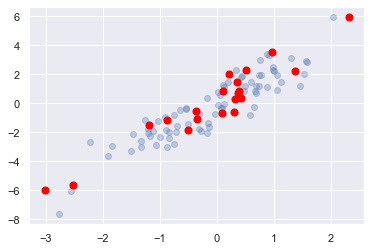

In [22]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter( selection[:,0], selection[:,1], facecolor='red', s=50 )

### 使用Fancy索引修改陣列

In [24]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
x[i] -=10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [50]:
x = np.zeros(10)
x[[0,0]] = [4,6] # x[0],x[0] = 4,6
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
#  不會重複累加，只加一次 : x[i] += 1 -> x[i] = x[i] + 1被計算之後，結果被指定x的索引
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [33]:
# at() 運算子對指定的索引(i)與指定的值(1)，在同一位置套用給定的運算
x = np.zeros(10)
np.add.at(x,i,1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

### 範例:資料裝箱(Binning Data)
例如: 假設有1000個值想要很快找出它們分別會落在陣列中的哪一個箱子，可子使用ufunc.at:

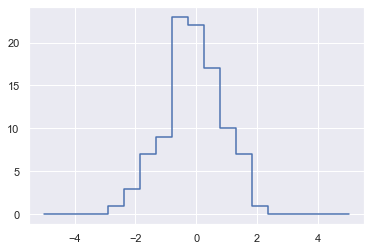

In [74]:
np.random.seed(42)
x = np.random.randn(100)

bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
i = np.searchsorted(bins,x) #對每一個x找到適當的指子
np.add.at(counts,i,1)
plt.plot(bins,counts,linestyle='solid', drawstyle='steps')

In [75]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x,bins)
#適合跑小的
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

NumPy routine:
19.3 µs ± 273 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
10.4 µs ± 37.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [76]:
x = np.random.randn(1000000)
#適合跑大的
print("NumPy routine:")
%timeit counts, edges = np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

NumPy routine:
48.2 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
79.2 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 排序陣列
例如: 選擇排序法，在數列中不斷地重複尋找其中的最小值，進行交換直到所有的內容都依序排列為止
但是這方法對於大量數據還是太慢了

In [78]:
import numpy as np
# O[N^2]
def selection_sort(x):
    for i in range(len(x)):
        swap =i + np.argmin(x[i:]) # 位置
        (x[i], x[swap]) = (x[swap],x[i]) # 換位置
    return x 

x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [84]:
#隨機打亂直到從小到大，有時候還比較快 O[NxN]
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
        print(x)
    return x 
x = np.array([2,1,4,3,5])
bogosort(x)

[4 3 2 5 1]
[3 5 4 1 2]
[1 3 5 4 2]
[5 4 2 3 1]
[2 4 3 1 5]
[4 3 5 1 2]
[1 3 2 5 4]
[1 2 3 4 5]


array([1, 2, 3, 4, 5])

### Numpy 中快速排序: np.sort 以及 np.argsort
np.sort 是使用 O[NlogN]的快速排序

In [91]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [92]:
x = np.array([2,1,4,3,5])
x.sort()
x

array([1, 2, 3, 4, 5])

In [94]:
# 換的位置
x = np.array([2,1,4,3,5])
x[np.argsort(x)] # x[回傳位置]

array([1, 2, 3, 4, 5])

### 沿著列或欄排序
用axis就可以

In [95]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [96]:
np.sort(X,axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

### 部分排序: 分區(partitoning)
找出陣列最小的K個值，不會從小排到大

In [97]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3) # 陣列中前3小的放左邊，其餘放右邊

array([2, 1, 3, 4, 6, 5, 7])

In [105]:
np.partition(X,2,axis=1), 

(array([[3, 4, 6, 7, 6, 9],
        [2, 3, 4, 7, 6, 7],
        [1, 2, 4, 5, 7, 7],
        [0, 1, 4, 5, 9, 5]]),)

In [106]:
np.argpartition(X,2,axis=1) #元素位置

array([[1, 3, 0, 2, 4, 5],
       [0, 4, 3, 2, 1, 5],
       [4, 1, 3, 2, 0, 5],
       [3, 1, 2, 0, 4, 5]], dtype=int64)

### 範例: K-近鄰算法


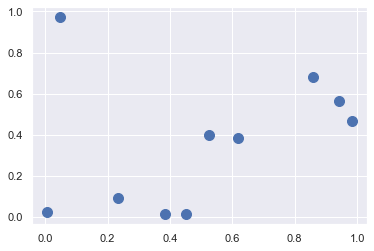

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()
X = rand.rand(10,2)
plt.scatter(X[:,0],X[:,1],s=100)

In [122]:
# np.newaxis 加維度
dist_sq =np.sum( (X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=1 )
dist_sq

array([[3.58879608, 2.10035624],
       [1.11234028, 0.97393943],
       [3.21004462, 4.71429169],
       [1.85007077, 1.68955454],
       [1.2368154 , 0.96342078],
       [3.39460409, 1.07078426],
       [2.36761815, 1.97878248],
       [1.13827476, 2.16752178],
       [3.01908822, 1.36825955],
       [1.25169759, 2.14881166]])

In [132]:
# 等同於上面的一行
#對每一對點，計算他們座標的差
differences = X[:,np.newaxis,:] - X[np.newaxis,:,:]
# 取這些座標差的平方
sq_differences = differences ** 2
#把座標的平方差加總起來已得到平方距離
dist_sq = sq_differences.sum(-1) # -1 : 對每一列加總
differences.shape, sq_differences.shape, dist_sq.shape

((10, 10, 2), (10, 10, 2), (10, 10))

In [133]:
# 確認對角線為0(自己對自己的點)
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [136]:
# 留意到第1攔所得到的數字依序是0~9，因為離每一個點最近的是它自己
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

In [137]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1) # 找K+1個最小的元素的位置放左邊，其餘放右邊
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]], dtype=int64)

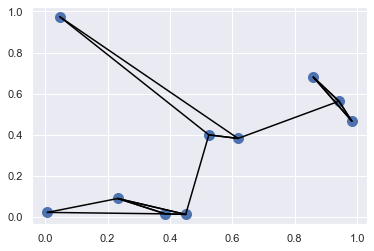

In [149]:
# 把近的點連起來
plt.scatter(X[:,0],X[:,1],s=100)
K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        #從X[i]到X[j]畫一條線
        #使用一些zip魔術讓這件事發生:
        plt.plot(*zip(X[j],X[i]), color='black') # * : 壓縮完取值出來(x,y)座標

### 結構化的資料 : NumPy的結構化陣列


In [170]:
name = ['Alice','Bob','Cathy','Doug']
age = [25,45,37,19]
weight = [55.0,85.5,68.0,61.5]

x = np.zeros(4, dtype=int)
# 複合型
data = np.zeros(4, dtype={'names':('name','age','weight'),'formats':('U10','i4','f8')}) # U10: 最大長度是10的Unicode字串
data.dtype

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [171]:
data['name'] = name
data['age'] = age
data['weight'] = weight
data

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [172]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

### 紀錄陣列 (np.recarray)
欄位可以被當作是屬性而不是字典來存取

In [175]:
print(data['age'])
%timeit data['age']

[25 45 37 19]
110 ns ± 1.33 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [177]:
data_rec = data.view(np.recarray) # 有紀錄比較快~~
print(data_rec.age)
%timeit data_rec.age
%timeit data_rec['age']

[25 45 37 19]
2.45 µs ± 20.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.87 µs ± 18.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
